I computed realizations of multiple HODs for a few statistics in the darksky boxes. This notebook is gonna combine them into a jackknife covmat. It'll also add some estimate of the shape noise contribution. 

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.colors as colors

In [53]:
import numpy as np
from glob import glob
from os import path

In [54]:
output_dir = '/home/users/swmclau2/Git/pearce/bin/covmat/ds14_covmat/'

In [55]:
outputs = sorted(glob(path.join(output_dir, 'xi_gg_gm_darksky_obs_???.npy')))
print len(outputs)

510


In [56]:
N = len(outputs) # Should be 512, but a few may not have finished. Should make sure that those get reestarted, but likely not super important
all_outputs = np.zeros((N, 2*18)) # num bins and num HODs 

In [57]:
for i,output_file in enumerate(outputs):
    output = np.load(output_file)
    all_outputs[i] = output

In [58]:
mean = all_outputs.mean(axis = 0)

In [59]:
R =(all_outputs - mean)
cov = R.T.dot(R)/(N-1)

In [60]:
cov.shape

(36, 36)

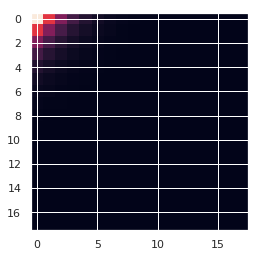

In [61]:
plt.imshow(cov[:18, :18])

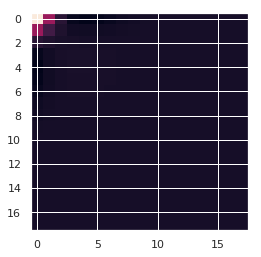

In [62]:
plt.imshow(cov[18:, 18:])

/share/software/user/open/py-jupyter/1.0.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


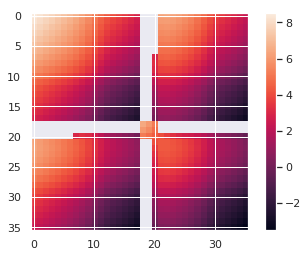

In [63]:
im = plt.imshow(np.log10(cov))#, norm=colors.LogNorm(vmin = min(np.min(cov), 0.0), vmax = np.max(cov)))
plt.colorbar(im);

In [64]:
r_bins = np.logspace(-1.1, 1.6, 19)
rpoints = (r_bins[1:]+r_bins[:-1])/2.0

[]

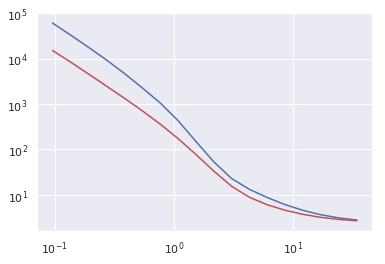

In [65]:
plt.plot(rpoints, all_outputs[0, :18].T, color = 'b')
plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r')

plt.loglog()

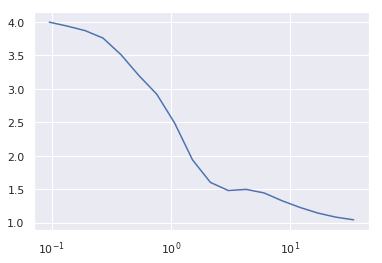

In [66]:
plt.plot(rpoints, all_outputs[0, :18].T/all_outputs[0, 18:].T, color = 'b')
#plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r', alpha = 0.3)

#plt.loglog()
plt.xscale('log')